In [1]:
 # import libaries 
 import numpy as np 

In [2]:
x = np.arange(12) 
print(x) 
print(x.shape)
print(x.size)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)
12


In [3]:

X = x.reshape(3,4) 
print(X) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [4]:
print(np.zeros((2,3,4)))
print("\n")
print(np.ones((2,3,4)))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [5]:
# Initializing random values 
print(np.random.normal(0, 1, size=(3,4)))
print("\n") 
print([[2,1,4,3], [1,2,3,4], [4,3,2,1]])

[[-0.55606623 -0.57091006  0.68610778 -0.56414766]
 [-0.26438975 -0.28366115  2.3720547   0.99464405]
 [-1.41558699 -0.54362944  1.1795254   1.87063136]]


[[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]


In [6]:
# operations 
x = np.array([1,2,4,8]) 
y = np.array([2,2,2,2])

# elementwise operations. 
print(x+y, x-y, x*y, x/y, x **y, np.exp(x))

[ 3  4  6 10] [-1  0  2  6] [ 2  4  8 16] [0.5 1.  2.  4. ] [ 1  4 16 64] [2.71828183e+00 7.38905610e+00 5.45981500e+01 2.98095799e+03]


In [7]:
# performing vector dot products and matrix multiplication 
X = np.arange(12).reshape(3,4) 
Y = np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]]) 
print(np.concatenate([X,Y], axis=0), "\n" , np.concatenate([X,Y], axis=1))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 2  1  4  3]
 [ 1  2  3  4]
 [ 4  3  2  1]] 
 [[ 0  1  2  3  2  1  4  3]
 [ 4  5  6  7  1  2  3  4]
 [ 8  9 10 11  4  3  2  1]]


In [8]:
# binary tensors via logical statements 
print(X == Y )

print("\n", X>Y)

print("\n", X.sum())

[[False  True False  True]
 [False False False False]
 [False False False False]]

 [[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]

 66


In [9]:
# Broaddcasting Mechanism 
"""
Broadcasting Mechanism works in the following ways:
* First, expand one or both arrays by copying elements appropaitely so that after this transformation, the two tensors have the same shape 
* Carry out the element wise operations on the resulting arrays. 
"""
a = np.arange(3).reshape(3,1) 
b = np.arange(2). reshape(1,2) 

print(a, "\n", b)
print("\n")
print(a+b)

[[0]
 [1]
 [2]] 
 [[0 1]]


[[0 1]
 [1 2]
 [2 3]]


In [10]:
# Indexing and Slicing 
X[-1], X[1:3]

(array([ 8,  9, 10, 11]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

In [11]:
# Write elements into matrix by specifying indicies  
X[1,2] = 9
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 8,  9, 10, 11]])

In [12]:
# assinging multiple values, same elements 
X[0:2, :] = 12
X

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [13]:
# Saving memory 
"""
Running operations can cause new memory to be allocated to host results
"""
before = id(Y)
Y = Y + X 
id(Y) == before

False

In [14]:
# using in-place operations to solve memory problems.. 
# We can assign the results of an operations to a previouslly allocated array with slice notationeg. Y[:] = expression. 
# Eg. below 
Z = np.zeros_like(Y) 
print(f"id(Z): {id(Z)}")
Z[:] = X+Y 
print(f"id(Z): {id(Z)}")

id(Z): 139681295558736
id(Z): 139681295558736


In [15]:
# If the value of X is not resued in subsequent computations, we can also use X[:] = X+Y or X += Y to reduce the memory overhead of the operations. 
before = id(X) 
X += Y 
id(X) == before

True

In [16]:
# conversion to Other Python Objects 
a = np.array([3.5]) 
a, a.item(), float(a), int(a)

(array([3.5]), 3.5, 3.5, 3)

## Data Preprocessing 


In [17]:
# Reading the Dataset 
"""
Creating a dataset that is stored in a csv file. The function below ensures that the directory exists. 
"""
import os 

def mkdir_if_not_exist(path):
    """Make a directory if it does not exist."""
    if not isinstance(path, str):
        path = os.path.join(*path) 
    if not os.path.exists(path):
        os.makedirs(path) 

In [18]:
# creating a folder and csv file. 
data_file = './data/house_tiny.csv'
mkdir_if_not_exist('./data')
with open(data_file, 'w') as f:
    f.write('NumRooms, Alley,Price\n') # Column names 
    f.write('NA,Pave,127500\n') # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA, 140000\n')

In [19]:
# loading data from csv via pandas 

import pandas as pd 

data = pd.read_csv(data_file) 
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       2.0    NaN  106000
2       4.0    NaN  178100
3       NaN    NaN  140000


In [20]:
# Handling Missing Data 
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  Alley
0       3.0   Pave
1       2.0    NaN
2       4.0    NaN
3       3.0    NaN


In [21]:
# dealing with categorical variables in the #Alley column 
inputs = pd.get_dummies(inputs, dummy_na=True) 
print(inputs)

# conversion to the Tensor Format 
print("\n") 
X, y = np.array(inputs.values), np.array(outputs.value_counts) 
print(X, y)

   NumRooms   Alley_Pave   Alley_nan
0       3.0            1           0
1       2.0            0           1
2       4.0            0           1
3       3.0            0           1


[[3. 1. 0.]
 [2. 0. 1.]
 [4. 0. 1.]
 [3. 0. 1.]] <bound method IndexOpsMixin.value_counts of 0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64>


## Linear Algebra

In [22]:
# Scalars 

import torch 

x = torch.tensor([3.0])
y = torch.tensor([2.0]) 

print(f"x + y = {x+y}")
print(f"x * y = {x*y}")
print(f"x / y = {x/y}")
print(f"x ** y = {torch.pow(x,y)}")
print(f"Converting Tensor to Float x.item() {x.item()}")

x + y = tensor([5.])
x * y = tensor([6.])
x / y = tensor([1.5000])
x ** y = tensor([9.])
Converting Tensor to Float x.item() 3.0


In [23]:
# Vectors
# 1D tensor is a vector 
x = torch.arange(4) 
print(f"x = {x}")

#element of vectors is a scalar. Accessing elements of a vector 
print(f"4th element of the vector x is {x[3]}")

x = tensor([0, 1, 2, 3])
4th element of the vector x is 3


In [24]:
# Length, dimensionality and shape 
print(f"len of vector x is {len(x)}")
print(f"shape of vector x is {x.shape}")

len of vector x is 4
shape of vector x is torch.Size([4])


In [25]:
# Metrics 
# Metrics generalize vectors from 1D to 2D. 
A = torch.arange(20, dtype=torch.float32).reshape((5,4))
print(A)

print(f"\n Transpose of Matrix A is \n {A.t()}")


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

 Transpose of Matrix A is 
 tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]])


In [26]:
# Tensors 
# Tensor gives a generic way of discussing arrays with arbitraru number of axes. Vectors - 1D Tensor
# metrics 2D tensors. 
X = torch.arange(24).reshape((2,3,4))
print(f"X.shape = {X.shape} \n")
print(f" X = {X}")


X.shape = torch.Size([2, 3, 4]) 

 X = tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


In [27]:
# Bassic properties of tensor arithmetic 
a = 2 
x = torch.arange(24, dtype=torch.float32).reshape((2,3,4)) 
print(f"Shape before addition of tensor {x.shape}")
print(f"Shape after addition of tensor {(a+x).shape}")
print(f"Shape before multiplication of tensor {x.shape}")
print(f"Shape after mulitplication of tensor {(a*x).shape}")

Shape before addition of tensor torch.Size([2, 3, 4])
Shape after addition of tensor torch.Size([2, 3, 4])
Shape before multiplication of tensor torch.Size([2, 3, 4])
Shape after mulitplication of tensor torch.Size([2, 3, 4])


In [28]:
# Sums and means 
print(x, "\n")
print(torch.sum(x),"\n") #sum 
print(torch.mean(x),"\n") #mean 


tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]]) 

tensor(276.) 

tensor(11.5000) 



In [29]:
# Dot Product 
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32) 
print(f"{x, y}, {torch.dot(x,y)}")

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.])), 6.0


In [30]:
# Matrix-vector product 
print(f"shape of A is {A.shape} and shape of x is {x.shape}")
print(torch.mv(A,x))

shape of A is torch.Size([5, 4]) and shape of x is torch.Size([4])
tensor([ 14.,  38.,  62.,  86., 110.])


In [31]:
# Matrix to matrix multiplication 
B = torch.ones(size=(4,3))
print(torch.mm(A,B))

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])


In [32]:
# norm
print(f"norm (L2) value is {torch.norm(x)}")
print(f"L1-norm is {torch.sum(torch.abs(x))}")


norm (L2) value is 3.7416574954986572
L1-norm is 6.0


In [33]:
# Automatic Differentiation 
from torch.autograd import Variable 

x = Variable(torch.arange(4, dtype=torch.float32).reshape((4,1)), requires_grad=True)
print(x)

y = 2*torch.mm(x.t(), x)
print("\n",y)

print(f"calling the backward function {y.backward()}")

tensor([[0.],
        [1.],
        [2.],
        [3.]], requires_grad=True)

 tensor([[28.]], grad_fn=<MulBackward0>)
calling the backward function None


In [34]:
# Since every variable except for inputs is the result of an operation, each variable has an associated
# grad_fn, which is torch.autograd.Function that is used to compute the backward step. For non inputs it
# is None:

print(f"x.grad: {x.grad}")
print(f"x.grad_fn: {x.grad_fn}")
print(f"y.grad: {x.grad_fn}")

x.grad: tensor([[ 0.],
        [ 4.],
        [ 8.],
        [12.]])
x.grad_fn: None
y.grad: None


In [35]:
print((x.grad - 4*x).norm().item() == 0)
print(x.grad)

True
tensor([[ 0.],
        [ 4.],
        [ 8.],
        [12.]])


In [36]:
# Commputing the gradient of python control flow 
def f(a):
    b = a *2 
    while b.norm().item() < 1000:
        b = b*2 
    if b.sum().item() > 0:
        c = b 
    else:
        c = 100 * b 
    return c

a = torch.randn(size=(1,)) 
a.requires_grad=True 
d = f(a) 
d.backward()

print(a.grad == (d/a))

tensor([True])


In [37]:
# Head gradients and the chain rule 
x = Variable(torch.tensor([[0.],[1.],[2.],[3.]]), requires_grad=True) 
y = x*2 
z = y*x 

head_gradient = torch.tensor([[10],[1.],[.1],[.01]]) 
z.backward(head_gradient) 
print(x.grad)

tensor([[0.0000],
        [4.0000],
        [0.8000],
        [0.1200]])


In [38]:
# Probability and Statistics 
from torch.distributions.multinomial import Multinomial 
from IPython import display 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

# drawing samples 
probabilities = torch.ones([6], dtype=torch.float64) / 6
distribution = Multinomial(total_count=1, probs=probabilities)
print(distribution.sample())

# other sample 
print((Multinomial(total_count=10, probs=probabilities)).sample())
print((Multinomial(total_count=100, probs=probabilities)).sample())


tensor([0., 0., 0., 0., 1., 0.], dtype=torch.float64)
tensor([4., 1., 2., 2., 1., 0.], dtype=torch.float64)
tensor([15., 17., 21., 11., 18., 18.], dtype=torch.float64)


In [39]:
# Simulating a 1000 rolls 
num_rolls = 1000 
rolls = Multinomial(total_count=1, probs=probabilities)
counts = torch.zeros(6,1000, dtype=torch.double)
totals = torch.zeros(6, dtype=torch.double) 
for i in range(num_rolls):
    totals += rolls.sample() 
    counts[:, i] = totals

print(totals/1000)
print("\n", counts)


tensor([0.1620, 0.1710, 0.1630, 0.1590, 0.1690, 0.1760], dtype=torch.float64)

 tensor([[  0.,   0.,   1.,  ..., 162., 162., 162.],
        [  0.,   0.,   0.,  ..., 171., 171., 171.],
        [  1.,   1.,   1.,  ..., 162., 162., 163.],
        [  0.,   0.,   0.,  ..., 159., 159., 159.],
        [  0.,   1.,   1.,  ..., 168., 169., 169.],
        [  0.,   0.,   0.,  ..., 176., 176., 176.]], dtype=torch.float64)


In [40]:
# normalizing the number of tosses 
x = torch.arange(1000, dtype=torch.double).reshape((1,1000))+1 
estimates = counts/x 
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])


tensor([0., 0., 1., 0., 0., 0.], dtype=torch.float64)
tensor([0.0000, 0.0000, 0.5000, 0.0000, 0.5000, 0.0000], dtype=torch.float64)
tensor([0.1980, 0.1485, 0.1683, 0.1287, 0.1980, 0.1584], dtype=torch.float64)


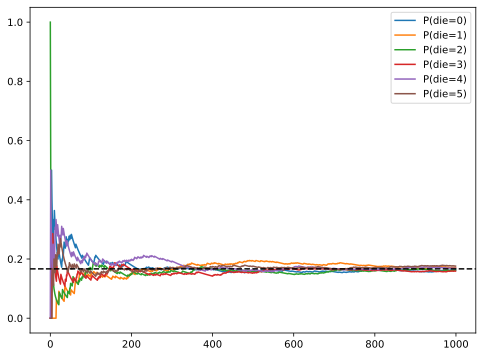

In [41]:
# ploting to visualize the convergence 
display.set_matplotlib_formats('svg') 

plt.figure(figsize=(8,6)) 
for i in range(6):
    plt.plot(estimates[i, :].numpy(), label=("P(die=" + str(i) +")"))
plt.axhline(y=0.16666, color="black", linestyle="dashed") 
plt.legend()
plt.show()

In [42]:
# Sampling
import random 

for i in range(10):
    print(random.random())

0.16371852255984487
0.6038297385949485
0.11749213286650928
0.6790404988344174
0.26969109798105295
0.9431440523375948
0.48465318469128216
0.22172535473254273
0.22890351825892208
0.6663466085689626


In [43]:
# Uniform Distrubution 
for i in range(10):
    print(random.randint(1,100))

22
36
76
93
47
37
39
63
44
79


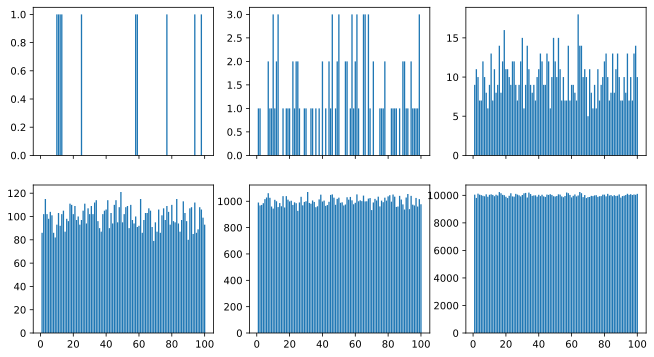

In [47]:
# checking uniformity of randint function 

import math 

counts = np.zeros(100)
fig, axes = plt.subplots(2,3, figsize=(11,6), sharex=True)
axes = axes.reshape(6)

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10,100,1000,10000,100000,1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1,101), counts)
        
plt.show()

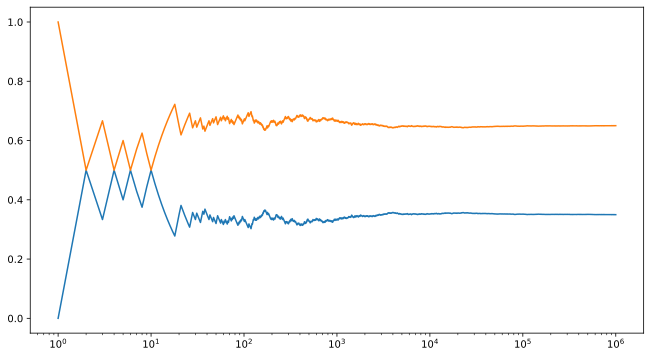

In [51]:
# The Categorical Distrubution 
# Drawing from a uniform distrubution over a set of 100 outcomes is simple. 

# number of samples
n = 1000000
y = np.random.uniform(0,1,n) 
x = np.arange(1, n+1) 
#count number of occurances and divide by the number of total draws 
p0 = np.cumsum(y<0.35)/x
p1 = np.cumsum(y>=0.35)/x

plt.figure(figsize=(11,6))
plt.semilogx(x,p0)
plt.semilogx(x,p1)
plt.show()


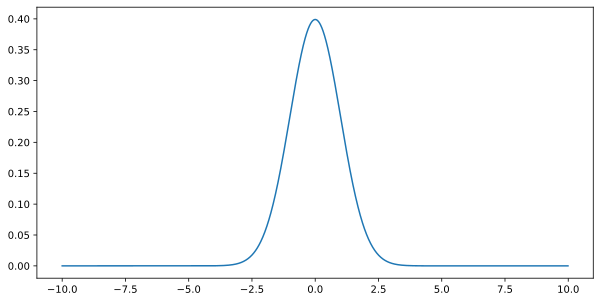

In [52]:
# The Normal Distribution 
x = np.arange(-10,10,0.01) 
p = (1/math.sqrt(2*math.pi)) * np.exp(-0.5*x**2)
plt.figure(figsize=(10,5)) 
plt.plot(x,p) 
plt.show()

mean 0.9, variance 0.49


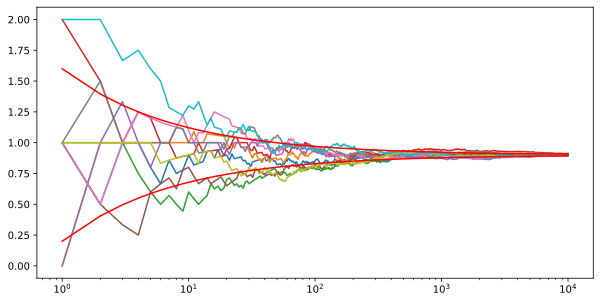

In [55]:
# Generate 10 random sequences of 10,000 uniformly distributed random variables 
tmp = np.random.uniform(size=(10000,10))
x = 1.0*(tmp>0.3)+1.0*(tmp>0.8) 
mean = 1*0.5+2*0.2
variance = 1*0.5+4*0.20-mean**2
print(f"mean {mean}, variance {variance}")

# Cumulative sum and noramlization 
y = np.arange(1, 10001).reshape(10000,1) 
z = np.cumsum(x, axis=0)/y

plt.figure(figsize=(10,5)) 
for i in range(10):
    plt.semilogx(y,z[:,i])

plt.semilogx(y, (variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y, -(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.show()